ch6. 2 pg. 382~406

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


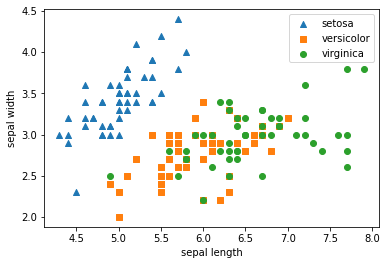

In [ ]:
markers=['^','s','o']
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

from sklearn.decomposition import PCA
pca=PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


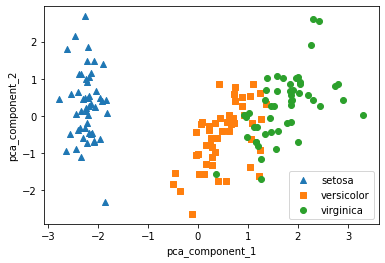

In [ ]:
markers=['^','s','o']
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import xlrd
df = pd.read_excel('/content/drive/MyDrive/Data/credit_card.xls', header=1, sheet_name='Data').iloc[:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


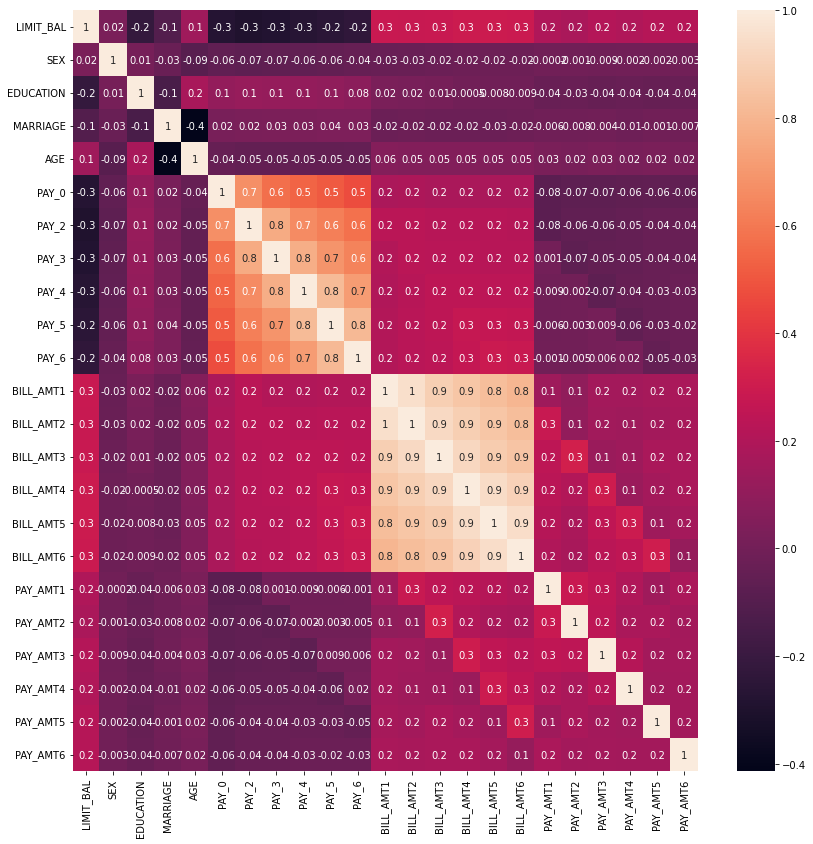

In [ ]:
df.rename(columns={'PAY0':'PAY1','default payment next month':'default'},inplace=True)
y_target = df['default']
X_features = df.drop('default',axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g') 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

scaler=StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA component 별 변동성:',pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA component 별 변동성: [0.90555253 0.0509867 ]


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy', cv=3)
print('CV=3인 경우의 개별 Fold 세트별 정확도:',scores)
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA (n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(pca,df_pca,y_target,scoring='accuracy', cv=3)
print('CV=3인 경우의 개별 Fold 세트별 정확도:',scores)
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'PCA' object has no attribute 'predict'

  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_val

### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


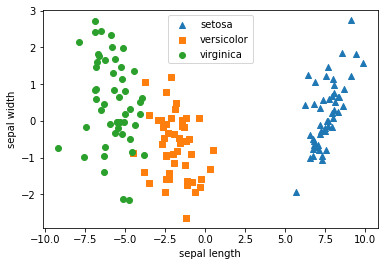

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

markers=['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### SVD

In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a=np.random.rand(4,4)
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [2]:
U,Sigma, Vt=svd(a)
print('U matrix:\n',np.round(U,3))
print('Sigma Value:\n',np.round(Sigma,3))
print('V transpose matrix: \n',np.round(Vt,3))

U matrix:
 [[-0.169  0.001 -0.128 -0.977]
 [-0.541 -0.828  0.126  0.076]
 [-0.662  0.355 -0.63   0.197]
 [-0.491  0.434  0.756 -0.014]]
Sigma Value:
 [2.153 0.725 0.356 0.007]
V transpose matrix: 
 [[-0.298 -0.612 -0.543 -0.492]
 [-0.815  0.522  0.075 -0.239]
 [-0.148  0.174 -0.714  0.662]
 [ 0.474  0.568 -0.436 -0.513]]


In [3]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
print(np.round(a_,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [4]:
a[2]=a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [5]:
U,Sigma,Vt=svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Vlaue:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Vlaue:
 [2.151 0.24  0.    0.   ]


In [6]:
U_=U[:,:2]
Sigma_=np.diag(Sigma[:2])
Vt_=Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape)

a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix=np.random.random((6,6))
print('원본 행렬:\n',matrix)

U,Sigma,Vt=svd(matrix,full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape,Vt.shape)
print('\nSigma값 행렬:',Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix,k=num_components)
print('\nTruncated SVD 분해 행렬 차원 : ',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬 : ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬 :\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 :
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.7267

Text(0, 0.5, 'TruncatedSVD Component 2')

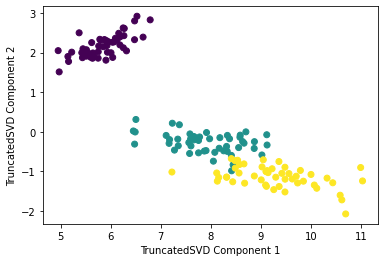

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

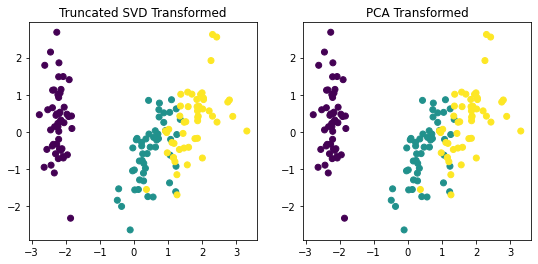

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1,ax2)  = plt.subplots(figsize=(9,4),ncols=2)
ax1.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
ax2.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [12]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.339760329927998e-15
4.85722573273506e-17
